## Ensemble Learning (Topluluk-Kolektif Öğrenme)

Yapılacak işlemler şu şekildedir:

    1-Kütüphaneler import edilir.
    
    2-Scikit Learn kütüphanesi ile 3 tane veri seti oluşturacağız. Oluşturacağımız veri setlerinden 2 tanesini binary classification problemi için kullanacağız. 1 veri setinde de multiclass yapacğaız.
    
    3-Basic classifier'ları implement edeceğiz, eğiteceğiz. Basic classifiers: SMV,KNN, Decision Trees
    
    4-Basic algoritmaları reain edip, test ettikten sonra sonuçları görselleştireceğiz.
    
    5-Ensemble learning algoritmalarından Random Forest ile devam edeceğiz.
    
    6-Ensemble learning algoritmalarından diğeri olan AdaBoost ile devam edeceğiz.
    
    7-Ensemble learning algoritmalarından biri olan voting classifier ile devam edeceğiz.
    
<br>
<img src="e1.png" align = "left" style="width:700px;height:300px"/><br> 
İzlenecek adımlara ait şema yanda gördüğünüz gibidir.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# warning library
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler satırındaki RobustScaler, StandardScaler'in neredeyse aynısıdır. Tek farkı outlier'lardan etkilenmeyen bir yöntem olmasıdır.

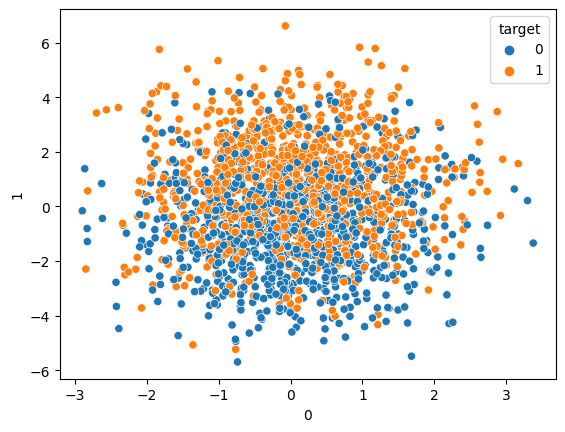

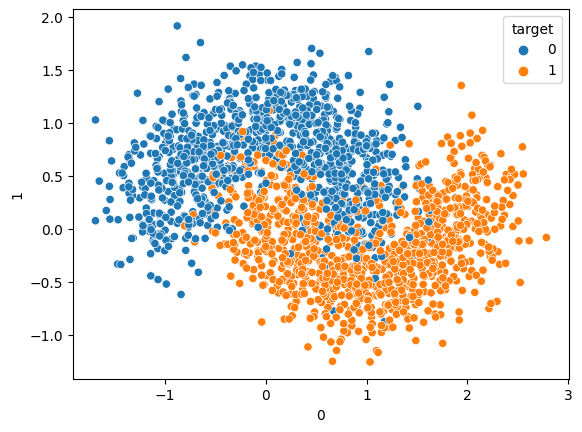

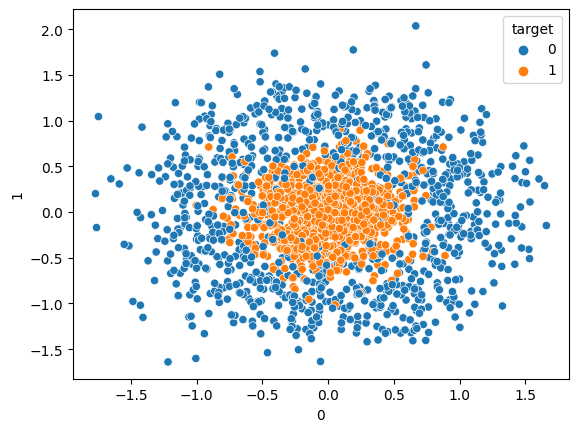

In [2]:
# %% Data Sets
random_state = 42



n_samples = 2000
n_features = 10
n_classes = 2

noise_moon = 0.3
noise_circle = 0.3
noise_class = 0.3

X,y = make_classification(n_samples = n_samples,
                    n_features = n_features,
                    n_classes = n_classes,
                    n_repeated = 0,
                    n_redundant = 0,
                    n_informative = n_features-1,
                    random_state = random_state,
                    n_clusters_per_class = 1,
                    flip_y = noise_class)

data = pd.DataFrame(X)
data["target"] = y
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )

data_classification = (X,y)

moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = random_state)

#moon dataset visualization:
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )

circle = make_circles(n_samples = n_samples, factor = 0.1,  noise = noise_circle, random_state = random_state)

#circle dataset visualization:
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y =  data.iloc[:,1], hue = "target", data = data )


datasets = [moon, circle]

Oluşturacağımız veri setlerinden ilki make_classification 'dır.

X,y = make_classification(n_samples = n_samples,
                    n_features = n_features,
                    n_classes = n_classes,
                    n_repeated = 0,
                    n_redundant = 0,
                    n_informative = n_features-1,
                    random_state = random_state,
                    n_clusters_per_class = 1,
                    flip_y = noise_class)
                    
satırında 1.parametre ile veri setinde olacak sample sayısı belirtilmiştir. 2.parametre ile feature sayısı belirlenmiştir. 3.parametre ile class sayısı belirlenmiştir. 4.parametre ile repeat eden kaç tane feature olmasını istiyorsak sayıyı belirtiyoruz. 5.parametre ile anlamsız sample sayısı belirtilmiştir. 6.parametre ile informative feature sayısı belirtilmiştir. 6.parametre ile ransom_state belirtilmiştir. 7.parametre ile verinin üzerinde ne kadar noise olsun bilgisi belirtilmiştir.

Bu işlem sonrasında iki tane tuple return edilecektir.

X, feature'lerdir. y ise label değerleri içermektedir.

Eğer class sayısı 3 olsaydı noktalar iç içe geçen bir görüntüde olurdu. Bunun sebebi 3 class'ı 2 boyutlu grafik üzerinde çizdirmemizdir. 0 ve 1 'e denk gelen feature'ler iç içe geçer.

moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = random_state)

satırında bir diğer veri seti oluşturulmuştur. 

circle = make_circles(n_samples = n_samples, factor = 0.1,  noise = noise_circle, random_state = random_state)

satırında bir diğer veri seti oluşturulmuştur. Burada factor parametresi ile iki daire arasındaki mesafe ayarlanmaktadır.

datasets = [moon, circle]

Bu satırda yapılan işlem, ilerleyen süreçlerde görselleştirme yapabilmemiz için veri setlerini birleştirmemiz gerekecektir. Veri setlerini birleştirirken sadece moon ve circle'yi birleştireceğiz. Çünkü bu ikisi binary classification oldukları için ve 2 boyutlu oldukları için bunları görselleştireceğiz, diğerini görselleştirmeyeceğiz. Çünkü feature sayısını (n_features) çok artıracağız ve n_features sayısı çok arttığında görselleştirme mümkün olmuyor. Sadece 2 boyutlu görselleştirebiliyoruz. İçinden rastgele feature seçtiğimizde de çok mantıklı olmuyor.

Bu nedenle make_classification'un sadece accuracy değerlerine bakacağız. moon ve circle veri setleri için ise hem accuracy hem de görselleştirme analizlerini gerçekleştireceğiz.

In [3]:
#KNN, SVM, Decision Trees, AdaBoost, Voting Classifier
n_estimators = 10

svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = random_state, max_depth = 2)

rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, max_depth = 2)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = n_estimators, random_state = random_state)
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "V1"]
classifiers = [svc, knn, dt, rf, ada, v1]

Veri setini ve classifiers'ları kullanarak eğitim işlemini gerçekleştirelim. İki farklı for döngüsü oluşturacağız. İlk for'da veri setlerini (3 tane) döndüreceğiz. İçteki for'da ise her bir veri seti için sınıflandırmaları döndüreceğiz. Yani her bir sınıflandırma algoritmasını her bir veri setine uygulayarak train ve test işlemleri gerçekleştirilecektir.

Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.8875 
Decision Tree: train set score: 0.9 

Random Forest: test set score: 0.8875 
Random Forest: train set score: 0.895 

AdaBoost: test set score: 0.8825 
AdaBoost: train set score: 0.9283333333333333 

V1: test set score: 0.91 
V1: train set score: 0.92 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.73125 
Decision Tree: train set score: 0.7675 

Random Forest: test set score: 0.87875 
Random Forest: train set score: 0.91 

AdaBoost: test set score: 0.88125 
AdaBoost: train set score: 0.9133333333333333 

V1: test set score: 0.895 
V1: train set score: 0.9125 

-------------------------------------


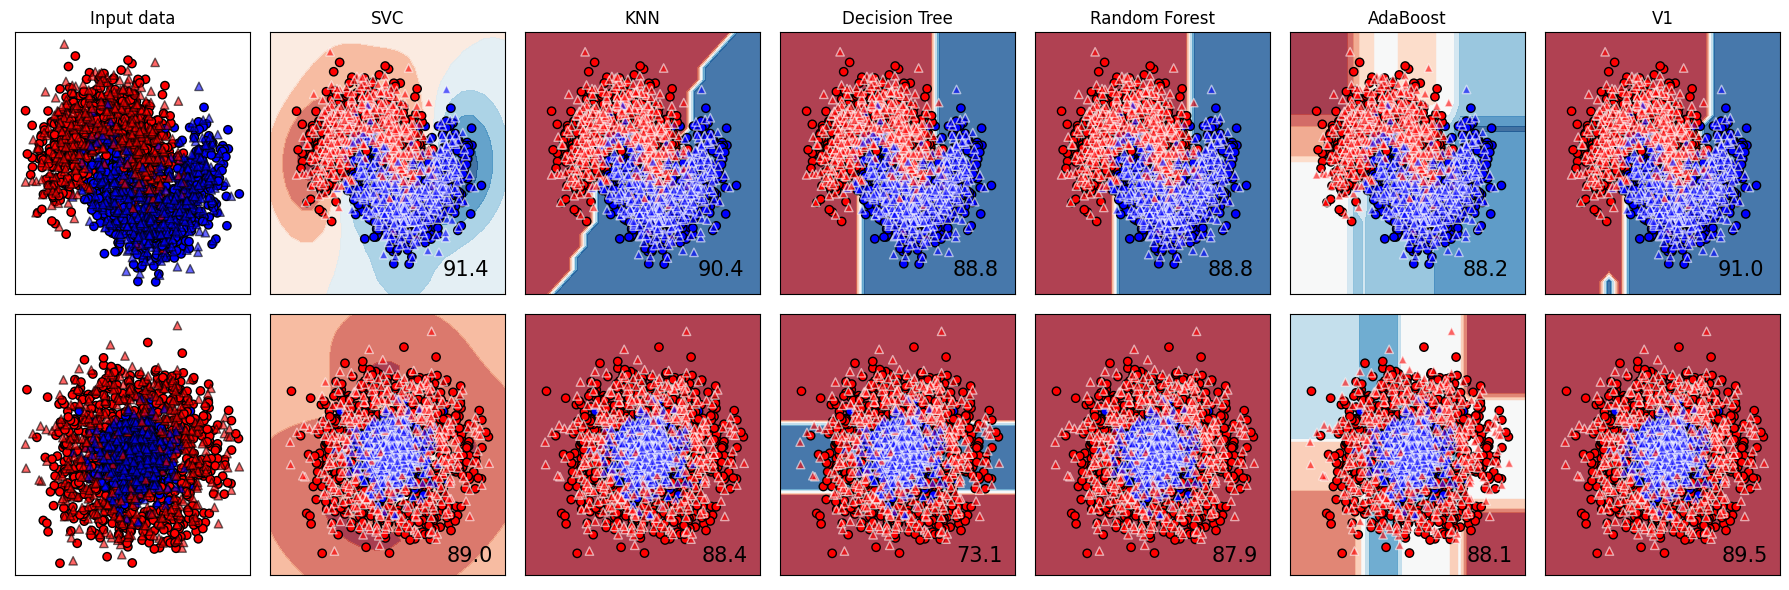

In [4]:
h = 0.2
i = 1
figure = plt.figure(figsize=(18, 6))
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))

    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {} ".format(name, score))
        
        score_train = clf.score(X_train, y_train)  
        
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

In [5]:
#make_classification veri seti 2 boyutlu olmadığı için görsekkeştirmeyeceğiz. Yani binary classification değildir ve bu 
#durumda 2 boyutlu görselleştirme için feature seçilmesi gerekmektedir. Ama seçilen feature'lerin görselleştirilmesi
#işlemi pek sağlıklı sonuç vermeyecektir. Dolayısıyla make_classification için görselleştirme yapılmayacaktır.

def make_classify(dc, clf, name):   # dc = make_classification
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

Dataset # 2
SVC: test set score: 0.83875 
SVC: train set score: 0.8666666666666667 

KNN: test set score: 0.835 
KNN: train set score: 0.8583333333333333 

Decision Tree: test set score: 0.77 
Decision Tree: train set score: 0.7708333333333334 

Random Forest: test set score: 0.7775 
Random Forest: train set score: 0.8058333333333333 

AdaBoost: test set score: 0.79 
AdaBoost: train set score: 0.8416666666666667 

V1: test set score: 0.8375 
V1: train set score: 0.8575 



make_classification veri seti yukarıdaki kod çıktısında bulunan sonuçlara göre değerlendirilecektir.

<font color="Teal"><br>
ALGORİTMA DEĞERLENDİRMELERİ

<font color="LightCoral"><br>
SVM:

<font color="MediumAquaMarine"><br>
Feature sayısı arttıkça SVM algoritmasının başarısı artacaktır. 
<font color="MediumAquaMarine"><br>
Noise arttıkça algoritmaların başarısı azalacaktır. Fakat noise'ı artırmamıza rağmen feature sayısını doğru ayarlayabilirsek SVM algoritmasının başarısında herhangi bir değişiklik olmayacaktır.
<font color="MediumAquaMarine"><br>    
Machine learning algoritmaları büyük veri setlerinde pek işe yaramaz. Veri boyutu 20.000 - 30.000 'lere çıktığında neural network'e yönelmek daha mantıklı olabilir.

<font color="LightCoral"><br>
KNN:

<font color="MediumAquaMarine"><br>    
KNN algoritması training işlemi gerektirmemektedir. 
<font color="MediumAquaMarine"><br>    
Veri boyutu arttıkça KNN'de karar verme süreci uzayabiliyor.
<font color="MediumAquaMarine"><br>    
KNN algoritması outlier değerlerden etkilenir. Bu nedenle KNN kullanılırken outlier değerlere dikkat etmek gerekmektedir.

<font color="LightCoral"><br>    
SVM ve KNN arasındaki farklılıklar:

<font color="MediumAquaMarine"><br>    
Feature sayısı artırıldığında SVM algoritması KNN algoritmasına göre daha güçlü bir model oluşturacaktır.
<font color="MediumAquaMarine"><br>    
Eğer class sayısı artırılsa KNN algoritması SVM algoritmasına göre daha iyi sonuçlar üretecektir.
<font color="MediumAquaMarine"><br>    
Genelde SVM algoritması binary classification problemleri için KNN algoritması multi class problemleri için kullanılmaktadır.
    
<font color="LightCoral"><br>
Decision Trees:
   
<font color="MediumAquaMarine"><br>  
Decision tree algoritmasında en büyük problem overfitting'dir. Bunu çözmek için bir yöntem regularization'dur. Diğer bir yöntem ise random forest'tır. Overfitting problemini çözmek için parametreleri ayarlamamız gerekmektedir.
<font color="MediumAquaMarine"><br>  
Decision tree'de dallanma arttıkça pruning işlemine ihtiyaç olabilir.
<font color="MediumAquaMarine"><br>     
Basit veri setlerinde decision tree'ler çok etkilidir. 
<font color="MediumAquaMarine"><br>      
Decision tree algoritması outlier değerlerden etkilenir.

<font color="BurlyWood">
RANDOM FOREST:

Random forest algoritması birden fazla decision tree'lerden oluşan ensemble learning algoritmasıdır.

Bootstrapped: Training data'sı içerisinden random bir şekilde seçeceğimiz sample'ler ile küçük sub setler oluşturma işlemidir.

Sub set sayısı kadar decision tree eğitilir. n tane decision tree var ise, bunlar ensemble classifier paketi içerisine verilir.

Test seti her bir decision tree'ye verilerek her birinden birer sonuç elde edilir. n tane decision tree var ise n tane sonuç elde edilir. Mesela binary classification ise 0 ve 1 şeklinde sonuçlar elde edilecektir. Sonrasında kaç tane 0 ve kaç tane 1 olduğu hesaplanır. En çok hangi değerden var ise sonuç o değerdir. Toplama ile sonuca ulaşmaya aggregate denir.

Bootstrapped'ın B harfi ve aggregate 'nin agg kısmı alınarak BAGGing elde edilir.
    
<br>
<img src="e2.png" align = "left" style="width:700px;height:400px"/><br> 

Overfitting durumu karşısında verilere noise eklenebilir. Ayrıca overfitting durumu karşısında random forest'ın max_depth parametresini küçük bir değer yaparak çok derine inilme önlenir ve böylece modelin karmaşıklığı azalır.

### Adaptive Boosting Classifier

<br>
<img src="e3.png" align = "left" style="width:400px;height:200px"/><br> 

Yukarıda gördüğünüz gibi kırmızı ve yeşil olmak üzere iki farklı sınıf bulunmaktadır. Adaptive Boosting algoritmasını kullanarak bu iki sınıfı birbirinden ayıracak bir model geliştirelim.

İzlememiz gereken adımlar şu şekildedir:

    1- Weight'ler initialize edilir. Bu işlem için w = 1/n formülü kullanılır. n:sample sayısıdır. 6 tane nokta yani sample olduğu için w=1/6 olacaktır.
    
    2-Weightleri initialize ettikten sonra yapılması gereken, error weight (E) parametresini hesaplamaktır. Bunun için weight'lerden yanlış olanlar toplanır.
    
    3-En küçük error weight (E) seçilir.
    
    4-Voting power (α) hesaplanır. α = 1/2 * log((1-E)/E) formülü ile hesaplanır.
    
    5- Weight'ler güncellenir. Weight'leri güncellerken eski ya da yeni olduğunu bakmaksızın doğru ya da yanlış olmasına göre sınıflandırma yapmalıyız. Sample'ler doğru ise w_eski/2(1-E) formülü kullanılır. Sample'ler yanlış ise W_eski/2E formülü kullanılır.
    
    6-Model (h(x)) oluşturulur.
    
Tüm bu adımlar aşağıda gördüğünüz şekildedir:

<br>
<img src="e4.png" align = "left" style="width:1000px;height:200px"/><br> 

Stump: Bir node ve 2 tane yapraktan oluşan bir decision tree'dir. Adaptive Boosting algoritması stump'lardan oluşmaktadır. Stump'ları kullanarak h(x) modelini elde etmeye çalışacağız. Stump'lara göre yapılan hata error olarak adlandırılır.

<br>
<img src="e5.png" align = "left" style="width:300px;height:200px"/><br> 

Şekilde görüldüğü üzere her bir nokta isimlendirilmiştir. Noktaların birer weight'leri vardır. 

Stump'lar bir önceki stump'ların açığını kapatmaya çalışacaklar. Adaptive Boosting 'de bir veri için bir stump oluşturulur. Bu stump'ın çıktısını bir sonraki stump alır. Bu stump'lar birbirlerinin hatalarını telafi ederek, yanlışlara odaklanarak bir Adaptive Boosting  algoritması geliştirmeye çalııyorlar.

<br>
<img src="e6.png" align = "left" style="width:700px;height:400px"/><br> 

Yapılan tüm adımlar yukarıda görüldüğü şekildedir. Bazı stump'lar belirlenmiştir. Bu stump'lara göre error'lar belirlenmiştir.


### Voting Classifier

<br>
<img src="e7.png" align = "left" style="width:700px;height:300px"/><br> 

Bir veri setinde kedi ve köpek resimleri olduğunu düşününüz. 1 değeri kedi sınıfını, 0 değeri köpek sınıfını ifade etmektedir. Bir çok algoritmanın kedi mi köpek mi sınıflandırması yaptığını düşünün. Mesela svm 1 sonucunu döndürsün, knn 1 sonucunu döndürsün, adaboost 0 sonucunu döndürsün, neural network 0 sonucunu döndürsün, cnn 1 sonucunu döndürsün. Bu durumda 3 tane 1 ve 2 tane 0 sonucu elde edilmiştir. Çoğunluk 1 olduğu için voting classifier sonucu 1'dir yani kedi sınıfıdır. Bu anlatılan işlem "hard voting classifier" dır.

Birde soft voting classifier vardır. Soft voting classifier, sınıf bilgisini net bir şekilde vermez, kaç olasılıklı o sınıfa ait olabileceği bilgisini verir. Mesela %65 kedi, %35 köpektir gibi. %65 daha büyük bir oran olduğu için sonuç kedi sınıfına aittir yönünde olacaktır.

Voting classifier metodu default olarak hard kullanır.

Bagging algoritması overfitting'i önlemektedir. Boosting algoritması ise bias'ı azaltmakta etkilidir.